In [ ]:
# Install required packages
!pip install selenium webdriver-manager pandas --quiet

# Set up and import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Setup Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run headless
chrome_options.add_argument('--no-sandbox')  # Needed for colab
chrome_options.add_argument('--disable-dev-shm-usage')  # Performance tweak

# Add a custom user-agent to mimic a real browser request
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

# Use webdriver-manager to automatically install and manage chromedriver
service = Service(ChromeDriverManager().install())

# Launch browser with the service and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Go to the URL
url = "https://www.parkrun.us/parkrunner/9934221/"
driver.get(url)

# Wait for a few seconds to ensure the page fully loads
time.sleep(5)

# Parse the page
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

# Locate the table containing the run data by its class
table = soup.find('table', class_='sortable')  # This is the correct table with the results

# Check if the table is found
if table:
    rows = table.find_all('tr')

    # Prepare lists to hold each column's data
    events = []
    run_dates = []
    gender_pos = []
    overall_pos = []
    times = []
    age_grades = []

    # Iterate through the rows to extract the data (skip the header row)
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')

        # Ensure the row has enough columns
        if len(cols) >= 6:
            events.append(cols[0].get_text(strip=True))  # Event
            run_dates.append(cols[1].get_text(strip=True))  # Run Date
            gender_pos.append(cols[2].get_text(strip=True))  # Gender Position
            overall_pos.append(cols[3].get_text(strip=True))  # Overall Position
            times.append(cols[4].get_text(strip=True))  # Time
            age_grades.append(cols[5].get_text(strip=True))  # Age Grade

    # Create a DataFrame from the lists
    df = pd.DataFrame({
        "Event": events,
        "Run Date": run_dates,
        "Gender Pos": gender_pos,
        "Overall Position": overall_pos,
        "Time": times,
        "Age Grade": age_grades
    })

    # Display the DataFrame
    print(df)

else:
    print("No table found")

# Clean up (quit the driver)
driver.quit()


              Event    Run Date Gender Pos Overall Position   Time Age Grade
0  Deep Run parkrun  26/04/2025         10               13  26:24    52.08%
1  Deep Run parkrun  29/03/2025          9               12  25:19    53.92%
2  Deep Run parkrun  22/03/2025          5                5  24:53    54.86%
3  Deep Run parkrun  01/03/2025         14               17  27:36    49.46%
4  Deep Run parkrun  01/02/2025         32               41  42:14    32.32%
5  Deep Run parkrun  25/01/2025         10               10  26:12    52.10%
6  Deep Run parkrun  21/12/2024         30               44  44:45    30.50%
7  Deep Run parkrun  14/12/2024         27               42  49:17    27.70%
8  Deep Run parkrun  07/12/2024          6                6  23:30    58.09%
9  Deep Run parkrun  23/11/2024         15               15  23:33    57.96%


              Event   Run Date   Time  Time (minutes)
9  Deep Run parkrun 2024-11-23  23:33       23.550000
8  Deep Run parkrun 2024-12-07  23:30       23.500000
7  Deep Run parkrun 2024-12-14  49:17       49.283333
6  Deep Run parkrun 2024-12-21  44:45       44.750000
5  Deep Run parkrun 2025-01-25  26:12       26.200000
4  Deep Run parkrun 2025-02-01  42:14       42.233333
3  Deep Run parkrun 2025-03-01  27:36       27.600000
2  Deep Run parkrun 2025-03-22  24:53       24.883333
1  Deep Run parkrun 2025-03-29  25:19       25.316667
0  Deep Run parkrun 2025-04-26  26:24       26.400000


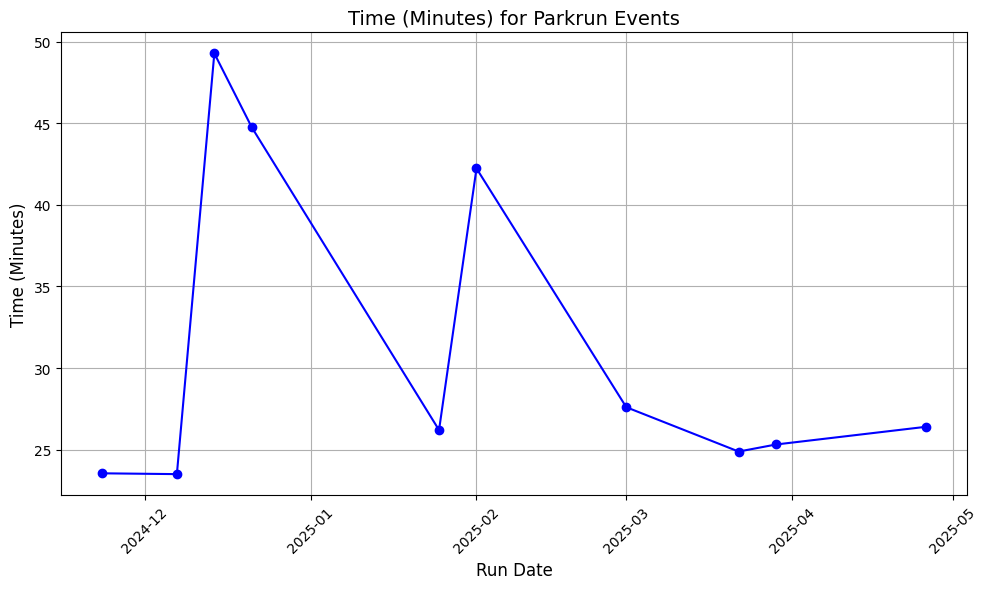

In [ ]:
# Install necessary packages
!pip install selenium webdriver-manager pandas matplotlib --quiet

# Set up and import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
from datetime import datetime

# Setup Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run headless
chrome_options.add_argument('--no-sandbox')  # Needed for colab
chrome_options.add_argument('--disable-dev-shm-usage')  # Performance tweak

# Add a custom user-agent to mimic a real browser request
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

# Use webdriver-manager to automatically install and manage chromedriver
service = Service(ChromeDriverManager().install())

# Launch browser with the service and options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Go to the URL
url = "https://www.parkrun.us/parkrunner/9934221/"
driver.get(url)

# Wait for a few seconds to ensure the page fully loads
time.sleep(5)

# Parse the page
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

# Locate the table containing the run data by its class
table = soup.find('table', class_='sortable')  # This is the correct table with the results

# Check if the table is found
if table:
    rows = table.find_all('tr')

    # Prepare lists to hold each column's data
    events = []
    run_dates = []
    times = []

    # Iterate through the rows to extract the data (skip the header row)
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')

        # Ensure the row has enough columns
        if len(cols) >= 5:
            events.append(cols[0].get_text(strip=True))  # Event
            run_dates.append(cols[1].get_text(strip=True))  # Run Date
            times.append(cols[4].get_text(strip=True))  # Time

    # Create a DataFrame from the lists
    df = pd.DataFrame({
        "Event": events,
        "Run Date": run_dates,
        "Time": times
    })

    # Convert 'Time' into minutes (if in MM:SS format)
    df['Time (minutes)'] = df['Time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60 if ':' in x else 0)

    # Convert 'Run Date' to datetime and sort by date
    df['Run Date'] = pd.to_datetime(df['Run Date'], format='%d/%m/%Y')
    df = df.sort_values(by='Run Date')

    # Display the DataFrame
    print(df)

    # Plotting the Time (in minutes) for each event
    plt.figure(figsize=(10, 6))
    plt.plot(df['Run Date'], df['Time (minutes)'], marker='o', color='b', linestyle='-', label='Time (Minutes)')

    # Adding labels and title
    plt.title('Time (Minutes) for Parkrun Events', fontsize=14)
    plt.xlabel('Run Date', fontsize=12)
    plt.ylabel('Time (Minutes)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.savefig('parkrun_time_line_graph.png')  # Save as image
    plt.show()

else:
    print("No table found")

# Clean up (quit the driver)
driver.quit()
